<a href="https://colab.research.google.com/github/Ahmed23Adel/Health-care-Heart-attack-possibility/blob/main/Heart_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Heart Attack
* it happens when oxygen can't reach the heart in a reasonable amount, as arteries are filled with fats preventing blood to reach the heart.

* Patients describe it as crushing, which could radiate to the arm, jaw, or back.
Some people experience it in silence, maybe they just severe nausea or are short of breath

* for women and the elderly, they might look weak and tired.
And many people especially diabetes, which affects nerves that carry pain, a heart attack might be silent

* Aspirine might help a lot, and might be prevented with exercise, and a healthy diet.

For competition: [Kaggle](https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility)

# 2.0 Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# 3.0 Data and general observatoins

### 3.0 importing data

In [ ]:
df= pd.read_csv("/content/heart.csv")
df.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0


### 3.1 Columns

* Age
  * Discrete
* Sex 1 = male; 0 = female)
  * Nominal 

* cp: chest pain type
  * Value 1: typical angina
  * Value 2: atypical angina
  * Value 3: non-anginal pain (pain in the chest that is not caused by heart disease or a heart attack)
  * Value 4: asymptomatic (Silent ischemia occurs when the heart temporarily doesn't receive enough blood (and thus oxygen), but the person with the oxygen-deprivation doesn't notice any effects.)

* trestbps:  resting blood pressure((in mm Hg on admission to the hospital)
  * Discrete numerical 

* chol:  serum cholestoral in mg/dl
  * Discrete numerical 

* fbs: fasting blood sugar > 120 mg/dl 
  * it's equal to 1; if blood sugar level is greater thatn 120 mg/dl
  * Ordinal

* restecg: resting electrocardiographic results
  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
  * Ordinal 

* thalach: maximum heart rate achieved
  * Numerical, discrete

* exang:  exercise induced angina (1 = yes; 0 = no)
  * qualtative 

* oldpeak = ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment
  * Value 1: upsloping
  * Value 2: flat
  * Value 3: downsloping

* ca: number of major vessels (0-3) colored by flourosopy

* thal: 
  * 0 = normal
  * 1 = fixed defect
  * 2 = reversable defect
* target:
 * 0= less chance of heart attack 
 * 1= more chance of heart attack

# 4.0 Questions

1- who has higher rates of heart rates? women or men?
  * this will be solved by first making sure that data are nearly balanced
  * then see the percentage of each sex having a high chance of heart attack

2- At what age do most heart attacks happen?
  * This will be the number of cases having high risk at each year or each 5 consecutive years

3- what are common features associated with non-anginal pain? which is a pain but not caused by heart diseases
  * This will be done after making oneHotEncoder of chest pain column and seeing a correlation with other columns

4- what are common features associated with typical angina pain? 
  * This will be done after making oneHotEncoder of chest pain column and seeing a correlation with other columns

5- how could cholesterol affect the risks of heart disease?
  * this will be conducted by seeing the relation between cholesterol and risk
  * correlation

6- to what extent does blood sugar affect heart disease?
  * relation and correlation

7- how blood sugar and asymptomatic agina are related?
  * we proposed that people with diabetes will probably have no signal indicating that they have agina so we want either to prove it or disprove it.



# 5.0 Data cleaning

### 5.1 null values

In [ ]:
print("Data set has {} null values".format(df.isnull().sum().sum()))

Data set has 0 null values


GREAT !!

### 5.2 One Hot encoding




There is not ordering in chest pain type, as no meaning for labeling typical higher value than silent type

In [ ]:
df_tmp=pd.get_dummies(df['cp'])
df_tmp.columns=['typical_anginal','atypical_anginal','non_anginal_pain','asymptomatic']
df_tmp=df_tmp.add_prefix('cp_')
df[df_tmp.columns]=df_tmp
df.drop(['cp'], inplace=True, axis=1)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_typical_anginal,cp_atypical_anginal,cp_non_anginal_pain,cp_asymptomatic
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


slope: the slope of the peak exercise ST segment

Value 1: upsloping
Value 2: flat
Value 3: downsloping

is also nominal.

In [ ]:
df_tmp=pd.get_dummies(df['slope'])
df_tmp.columns=['unsloping','flat_value','downsloping']
df_tmp=df_tmp.add_prefix('slope_')
df[df_tmp.columns]=df_tmp
df.drop(['slope'], inplace=True, axis=1)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target,cp_typical_anginal,cp_atypical_anginal,cp_non_anginal_pain,cp_asymptomatic,slope_unsloping,slope_flat_value,slope_downsloping
0,63,1,145,233,1,0,150,0,2.3,0,1,1,0,0,0,1,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,2,1,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,2,1,0,1,0,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,2,1,0,1,0,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,2,1,1,0,0,0,0,0,1


NO OTHER DATA CLEANING IS NEEDED!! 🤞



# 6.0 EDA

### 6.1 who have higher rates of heart rates? women or men?

In [ ]:
df.sex.value_counts()/len(df)

1    0.683168
0    0.316832
Name: sex, dtype: float64

$70 $ % of people in dataframe are male and only $30$ % are females

**Data is not balanced!!**

In [ ]:
len(df)

303

I would have take $80$%  of males rows to make it balanced, but data has only 300 observations, i can't take off any more.


[Text(0.5, 1.0, 'Histogram for heart diseases with respect to sex. \n 1: High risk.\n 0: Low risk')]

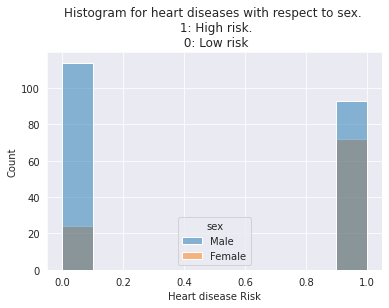

In [ ]:
df_sex=df.copy()
df_sex['sex']=df_sex['sex'].apply(lambda x: 'Male' if x==1 else 'Female') 
ax=sns.histplot(df_sex, x='target', hue='sex')
ax.set(xlabel='Heart disease Risk', ylabel='Count')
ax.set(title = "Histogram for heart diseases with respect to sex. \n 1: High risk.\n 0: Low risk")

In [ ]:
print("number of men having high risk is: {}".format(len(df_sex.query("target == 1").query("sex =='Male'"))))

number of men having high risk is: 93


In [ ]:
print("number of men having high risk is: {}".format(len(df_sex.query("target == 1").query("sex =='Female'"))))

number of men having high risk is: 72


at higher risk, a number of males exceed the number of women, by not a very large difference; only by 20. **BUT** data is not balanced, as the number of males exceeds the whole dataset. SO I would conclude that women have a higher usually higher risk of heart diseases.

I actually searched online, and many websites confirms my result.
**WOMEN** have higher risks than men. As many problems develop more while pregnancy.
[For more information](https://health.clevelandclinic.org/women-men-higher-risk-heart-attack/)

### 6.2  what age mostly heart attack happend?

[Text(0.5, 1.0, '\n Histogram for number of people having high risk at certain age\n')]

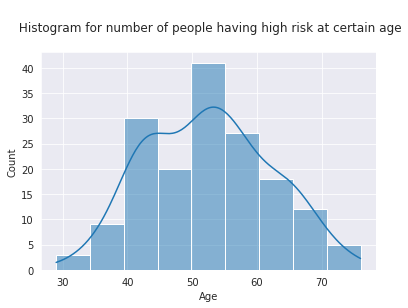

In [ ]:
ax=sns.histplot(df.query("target ==1"), x='age',kde=True)
ax.set(xlabel='Age', ylabel='Count')
ax.set(title = "\n Histogram for number of people having high risk at certain age\n")

From the graph above, it's so normally distributed. mostly it happens at the age between 50 and 55

Lett's see same graph for different sex

[Text(0.5, 1.0, '\n Histogram for number of people having high risk at certain age\n')]

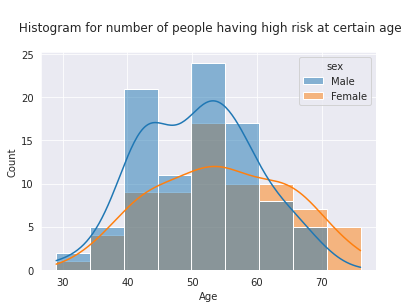

In [ ]:
ax=sns.histplot(df_sex.query("target ==1"), x='age',kde=True, hue='sex')
ax.set(xlabel='Age', ylabel='Count')
ax.set(title = "\n Histogram for number of people having high risk at certain age\n")

both of them are normally distributed, but due to unbalanced data, the count of females is a bit less than males.
**BUT** both of them have the highest risks at the age between 50 and 55

**Observation** male distribution have some outliers at age 40-45, as it's nearly equal to 20 cases at that age while max at 50-55 is 55, Female distribution doesn't have that kind of outliers

### 6.3 what are common features associated with non-anginal pain? which is a pain but not caused by heart diseases && 6.4 what are common features associated with typical angina pain?

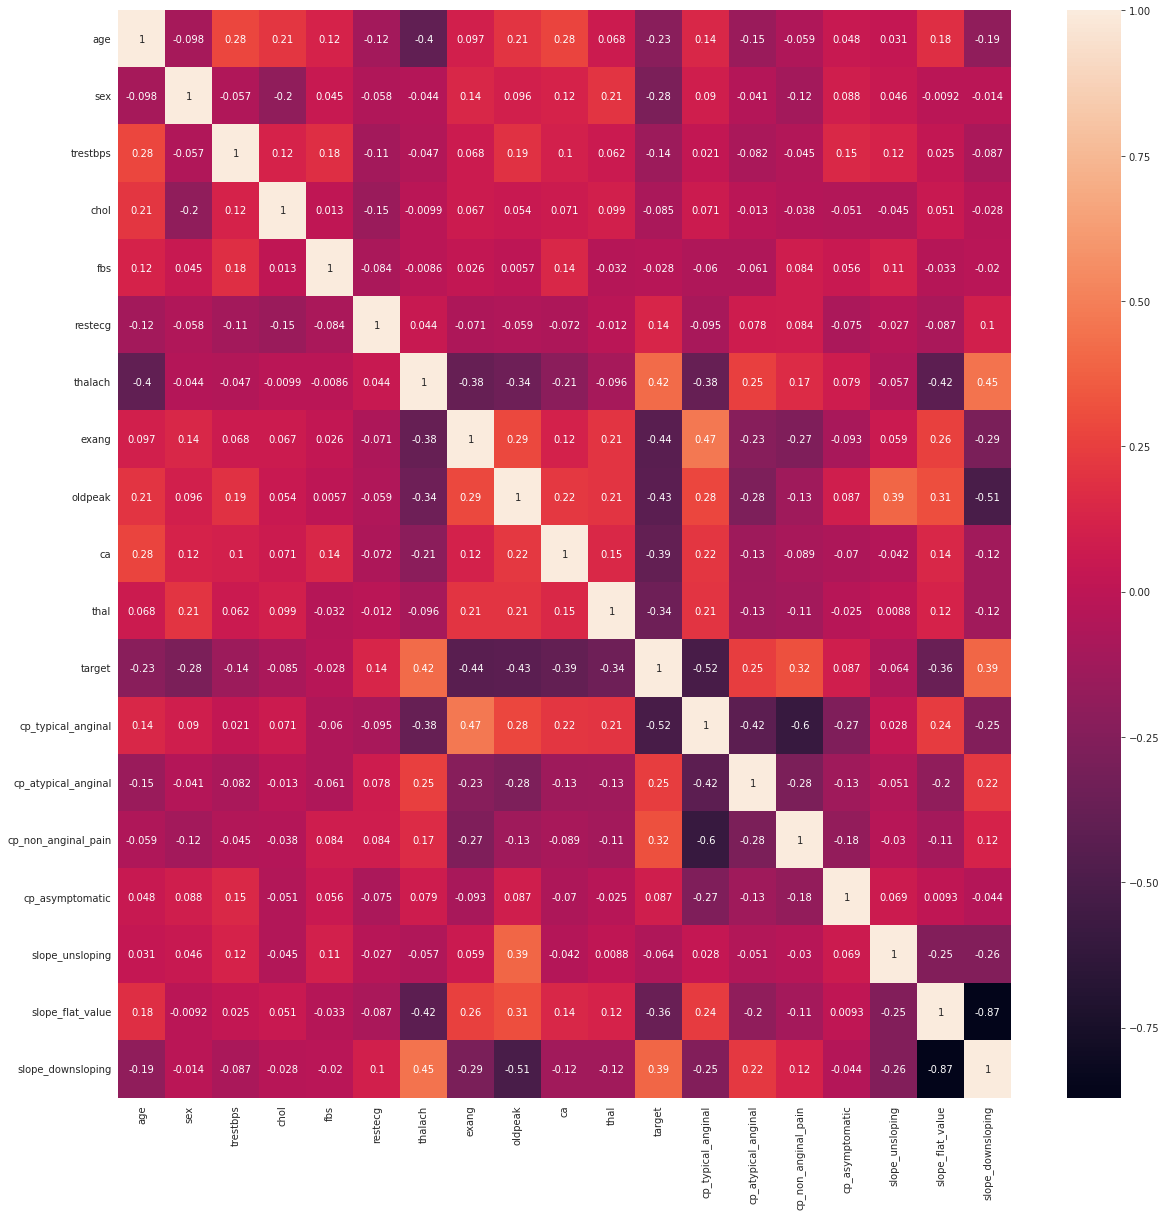

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True,)

In [ ]:
df.corr()['cp_non_anginal_pain'].sort_values()[:5]

cp_typical_anginal    -0.599986
cp_atypical_anginal   -0.282135
exang                 -0.271028
cp_asymptomatic       -0.181894
oldpeak               -0.132444
Name: cp_non_anginal_pain, dtype: float64

In [ ]:
df.corr()['cp_non_anginal_pain'].sort_values(ascending=False)[:5]

cp_non_anginal_pain    1.000000
target                 0.316742
thalach                0.165475
slope_downsloping      0.120276
restecg                0.084196
Name: cp_non_anginal_pain, dtype: float64

highes correlatoin with non anginal pain are :

1-exang -0.27

2-oldpeak -0.13

3- slope downsloping 0.12

There exist no clear relation with pain that's not caused by angina. correlation range between -0.3 to 0.3 only

**BUT** there is another way to have a prediction, I find the anginal pain have reasonable higher correlations with some columns, if these symptoms don't appear on the patient they would have a higher probability of having non-anginal pain

these features are:

In [ ]:
df.corr()['cp_typical_anginal'].sort_values()[:10]

cp_non_anginal_pain   -0.599986
target                -0.516015
cp_atypical_anginal   -0.420274
thalach               -0.376561
cp_asymptomatic       -0.270952
slope_downsloping     -0.251935
restecg               -0.094591
fbs                   -0.060190
trestbps               0.021447
slope_unsloping        0.028350
Name: cp_typical_anginal, dtype: float64

In [ ]:
df.corr()['cp_typical_anginal'].sort_values(ascending=False)[:10]

cp_typical_anginal    1.000000
exang                 0.469061
oldpeak               0.280243
slope_flat_value      0.237724
ca                    0.218226
thal                  0.207277
age                   0.138253
sex                   0.089621
chol                  0.070684
slope_unsloping       0.028350
Name: cp_typical_anginal, dtype: float64

These features are

1-exang 0.46

2- thalach -0.37

3- slope_downsloping -0.29

4- oldpeak 0.28

5-slope flat valie 0.23

### 6.5 how could cholesterol affect risks of heart diseas?

[Text(0.5, 1.0, '\n Histogram for number of people having high risk for different ranges of cholestrol\n')]

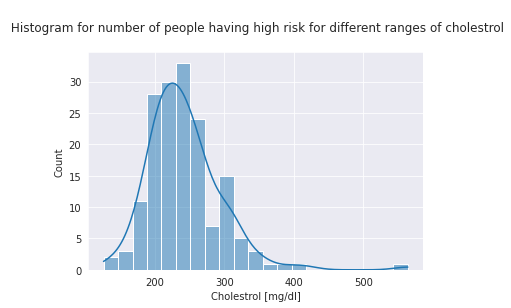

In [ ]:
ax=sns.histplot(df_sex.query("target ==1"), x='chol',kde=True)
ax.set(xlabel='Cholestrol [mg/dl]', ylabel='Count')
ax.set(title = "\n Histogram for number of people having high risk for different ranges of cholestrol\n")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



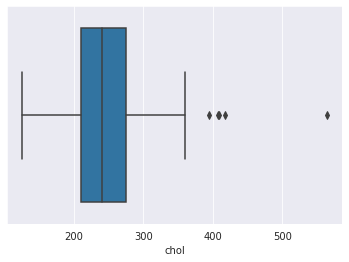

In [ ]:
sns.boxplot(df['chol'])

In [ ]:
cholestrol=pd.cut(df_sex.query("target ==1")["chol"],
       bins=[0, 100, 200, 300, 400, 500, np.inf], 
       labels=["0", "100", "200", "300", "400", "500"])

In [ ]:
Counter(cholestrol).most_common(1)

[('200', 112)]

In [ ]:
Counter(cholestrol).most_common()[:-10:-1]

[('500', 1), ('400', 1), ('300', 21), ('100', 30), ('200', 112)]

From the analysis above, most people have a high risk at cholesterol level between  200 and 300 

at the lowest level having people at high risk is at 100-200



### 6.6 to what extend blood sugar affect heart diseas?

[Text(0.5, 1.0, '\n Histogram for number of people having high risk \n 0: low risk \n 1: high risk')]

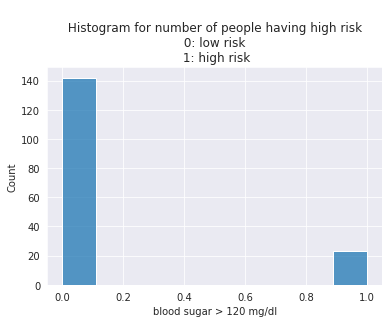

In [ ]:
ax=sns.histplot(df_sex.query("target ==1"), x='fbs')
ax.set(xlabel='blood sugar > 120 mg/dl', ylabel='Count')
ax.set(title = "\n Histogram for number of people having high risk \n 0: low risk \n 1: high risk")

[Text(0.5, 1.0, '\n Histogram for number of people having high risk \n 0: less than 120 \n 1: greater than 120')]

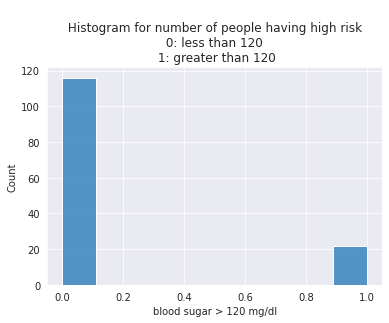

In [ ]:
ax=sns.histplot(df_sex.query("target ==0"), x='fbs')
ax.set(xlabel='blood sugar > 120 mg/dl', ylabel='Count')
ax.set(title = "\n Histogram for number of people having high risk \n 0: less than 120 \n 1: greater than 120")

From result it seems that 120 is not a good threshold, as data doesn't make sense at all.


### 6.7  how blood sugar and asymptomatic agina are related?

From the correlation matrix presented in section 6.3, the correlation is 0.053. **very low**
I still think of the fbs threshold as the wrong one, it could be lower or higher.
or just data is so small and doesn't reveal most of the facts.

# 7.0 Modeling

In [ ]:
X=df.drop(['target'], axis=1).values
y_train=df['target'].to_list()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle=True)

In [ ]:
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'fit_intercept':[True,False],'max_iter':np.arange(100,2000,200)}
lg_reg = LogisticRegression()
clf = GridSearchCV(lg_reg, parameters)
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

{'fit_intercept': True, 'max_iter': 900, 'penalty': 'l2'}

In [ ]:
clf.best_score_

0.8267006802721089

# 8.0 model performance

In [ ]:
predictions=clf.best_estimator_.predict(X_test)

In [ ]:
confusion_matrix(y_test,predictions)

array([[24,  7],
       [ 2, 28]])

In [ ]:
len(X_test)

61

True positive = 24 

False positive 7

False negative 2

true negative 28

True positive and true negative are relativly high, while FP and FN are small which is good.

In [ ]:
precision_score(y_test, predictions)

0.8

In [ ]:
recall_score(y_test, predictions)

0.9333333333333333

In [ ]:
f1_score(y_test, predictions)

0.8615384615384616

The scores are really good.

In [ ]:
probs=clf.best_estimator_.predict_proba(X_test)[:,1]

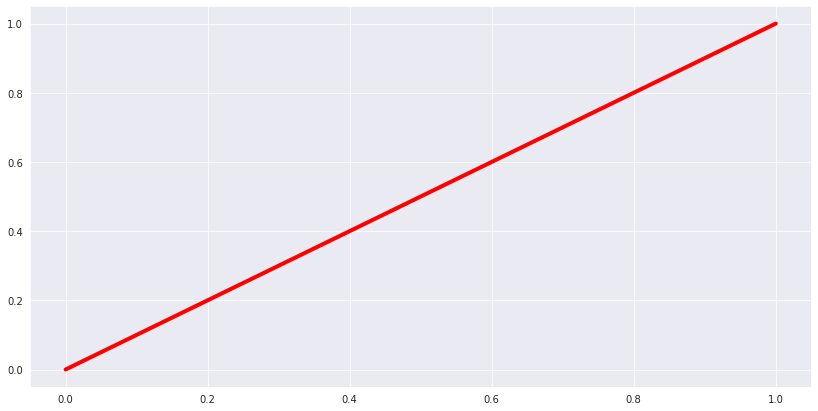

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)

plt.figure(figsize=(14, 7))
plt.plot([0, 1], [0, 1], 'r', linewidth=4)

In [ ]:
auc_score = roc_auc_score(y_test, probs)
print("ROC-AUC-Score:", auc_score)

ROC-AUC-Score: 0.9086021505376344


**Really good score**

# 9.0 Findings and observations.

1.   As observed from the Logistic Regression model, data is linearly separable
2.   Women have higher rates of heart diseases than males.
3.   heart attacks mostly happen at age 50-55 for men and women, but men have a higher risk than women at age 40-45
4.  pain caused by non- angina have no clear definition or correlation. But I  find the anginal pain have reasonable higher correlations with some columns, if these symptoms don't appear on the patient they would have a higher probability of having non-anginal pain
5.  most people have a high risk at cholesterol level between 200 and 300
6.  Data set doesn't reveal clear relation between blood sugar and risk.

**Conclusions**
* To prevent heart disease risk you may consider the following
  * make cholesterol level less than 200
  * From the internet:
    * Eat healthy food
    * do many exercises
    * do regular heart checks especially between age 50-55

# 10.0 Limitations

* Dataset is so small, and final results can't be generalized to all population, the test set is already very small, small error doesn't indicate the low generalized error; as it's so small

* Especially it's something related to people's health, more accuracy is required. data should be larger to generalize the error.

* Dataset provided some features, out of many features originally published online, I don't trust his judgment, as it's wasn't known what algorithm and what criteria he used to filter the columns, may be there are some other columns that have a more important weight

* threshold for sugar level doesn't reveal any meaningful output, I suggest finding some other threshold, or just publishing blood sugar as a continuous variable, and then I will try to see the relation.